# Q 2.4

In [1]:
import numpy as np
import pandas as pd
import random
import math
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
from numpy.polynomial.polynomial import Polynomial

In [2]:
def log_MSE(y_pred, y_true):
    return math.log(np.square(np.subtract(y_true,y_pred)).mean())

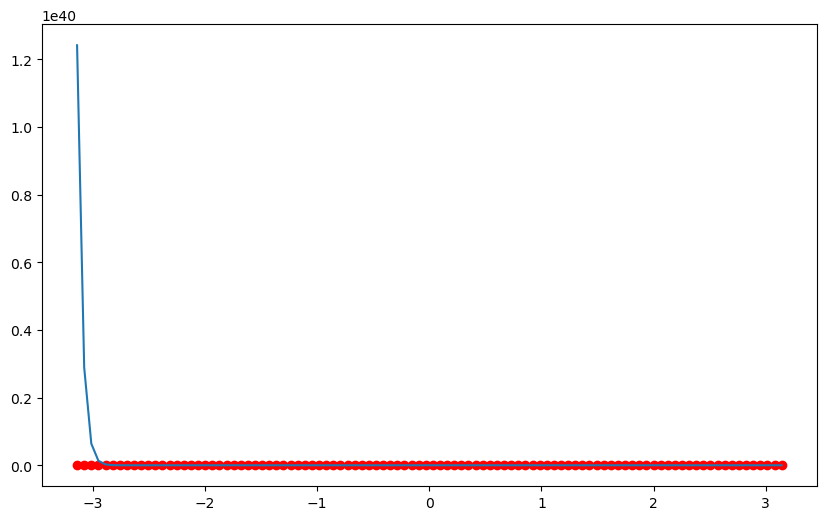

In [3]:

# training data, size =100
x = np.linspace(- np.pi, np.pi, 100)  
y = np.sin(x)

random.seed(531)
# randomed drwan test data (fixed for different training sets)
x_test = np.random.uniform(- np.pi, np.pi, 50) # draw random test set, size =50
y_test = np.sin(x_test)

poly = lagrange(x, y)

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='Data Points')
plt.plot(x, poly(x), label='Lagrange Interpolation')
#plt.plot(x_interpolate, sin_function(x_interpolate), label='sin(x)', linestyle='--')

In [4]:
train_error = [log_MSE(y, poly(x))]
test_error = [log_MSE(y_test, poly(x_test))]

print("Train Error (no error):", train_error)
print("Test Error (no error):", test_error)

Train Error (no error): [180.0887087887526]
Test Error (no error): [176.7795423789798]


In [5]:
sigma = [0.01, 0.1, 0.2, 0.3, 0.5, 1, 2, 5, 10, 20]

for sd in sigma:
    x_train = np.add(x, np.random.normal(0,sd,100)) # train data (x+\epsilon, sin(x+\epsilon))
    y_train = np.sin(x_train) # y_train based on x_train
    poly = lagrange(x_train, y_train)
    
    train_error.append(log_MSE(y_train, poly(x_train)))
    test_error.append(log_MSE(y_test, poly(x_test)))
    
err = { 'sd':[0]+sigma, 'log_train_error':train_error, 'log_test_error':test_error}
err = pd.DataFrame(err).set_index('sd')
print(err)

       log_train_error  log_test_error
sd                                    
0.00        180.088709      176.779542
0.01        182.174078      178.482079
0.10        184.750649      184.520809
0.20        209.468679      194.140275
0.30        211.571856      202.156750
0.50        244.573510      198.104089
1.00        238.948219      186.107376
2.00        208.114541      111.678751
5.00        262.176937       50.730112
10.00       238.446246        4.828672
20.00       234.617834      -32.938102


<AxesSubplot:title={'center':'log_err v.s. standard_deviation'}, xlabel='sd'>

<Figure size 800x600 with 0 Axes>

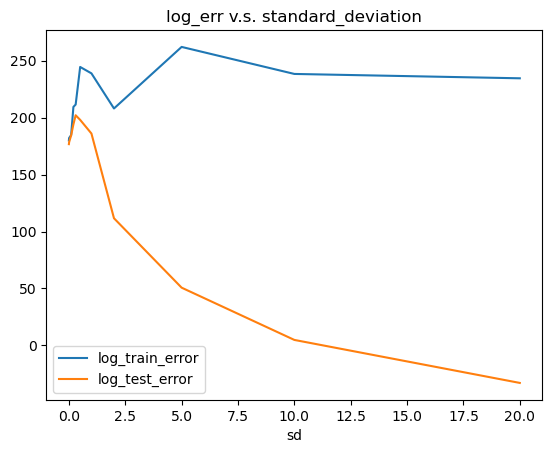

In [6]:
plt.figure(figsize=(8, 6))
err.plot(title="log_err v.s. standard_deviation")
#plt.plot(err['sd'], err['log_test_error'], label='mial')

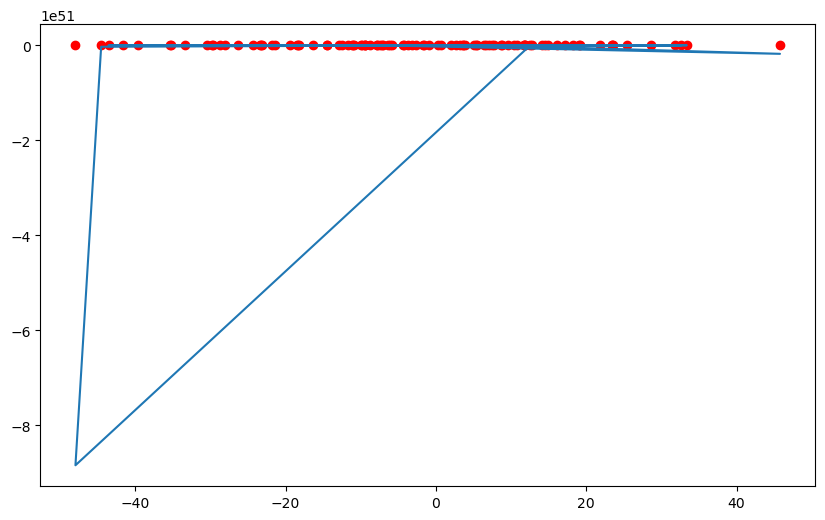

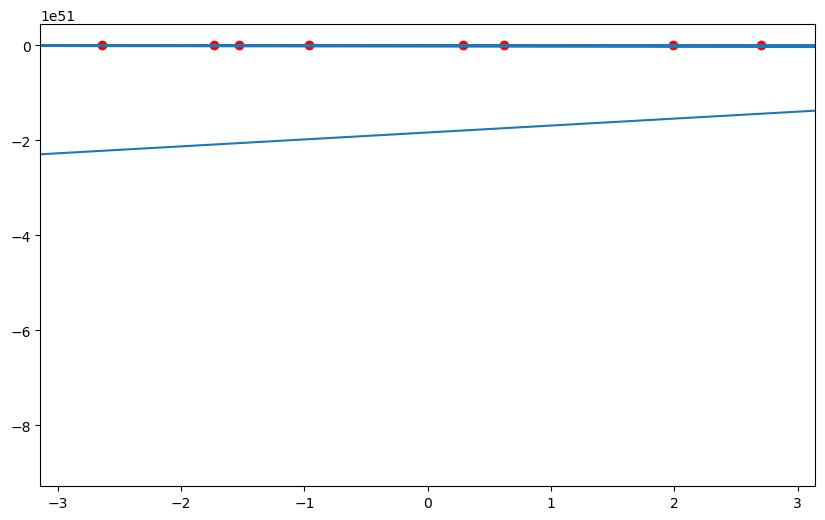

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(x_train, y_train, 'ro', label='Data Points')
plt.plot(x_train, poly(x_train), label='Lagrange Interpolation')

plt.figure(figsize=(10, 6))
plt.xlim(- np.pi, np.pi)
plt.plot(x_train, y_train, 'ro', label='Data Points')
plt.plot(x_train, poly(x_train), label='Lagrange Interpolation')
